In [55]:
from time import time,sleep
from random import randint
from IPython.core.display import clear_output
from requests import get
from bs4 import BeautifulSoup
from urllib.parse import urlencode
from urllib.request import Request, urlopen

In [159]:
song_titles = []
artists = []
plays = []
positions = []

In [164]:
dates = ["2021-04-26","2021-01-15","2021-02-01","2021-02-15","2021-3-01",
         "2021-03-15"]
for date in dates:
    print(date)

2021-04-26
2021-01-15
2021-02-01
2021-02-15
2021-3-01
2021-03-15


In [163]:
for date in dates:

    # Make a get request
    url = r'https://spotifycharts.com/regional/global/daily/2021-04-26'

    # Creating request headers
    req_headers = {}
    req_headers['user-agent'] = r'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17'
    
    # Creating a request object
    req = Request(url, headers=req_headers)
    
    # Parse the content of the request with BeautifulSoup
    response = urlopen(req)
    page_content = response.read()
    bs = BeautifulSoup(page_content, 'lxml')
        
    #scrape name of song
    titles = bs.select('.chart-table-track > strong')
    for title in titles:
        title = title.text
        song_titles.append(title)
#     print(song_titles)
    
    #scrape name of artist
    artist = bs.select('.chart-table-track > span')
    for a in artist:
        a = a.text
        artists.append(a[3:])
#     print(artists)

    #scrape number of plays
    temp_plays = []
    play = bs.select('.chart-table-streams')
    for p in play:
        p = p.text
        if p == 'Streams\n                                        \n':
            pass
        else:
            plays.append(p)
#     print(plays)
    
    #scrape position of song
    temp_positions = []
    position = bs.select('.chart-table-position')
    for i in position:
        i = i.text
        positions.append(i)
    
#     print(positions)


In [86]:
import pandas as pd

top_songs = pd.DataFrame({'track': song_titles,
                              'artist': artists,
                              'streams': plays,
                              'position': positions})

print(top_songs.info())
top_songs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   track     1200 non-null   object
 1   artist    1200 non-null   object
 2   streams   1200 non-null   object
 3   position  1200 non-null   object
dtypes: object(4)
memory usage: 37.6+ KB
None


,track,artist,streams,position
0,MONTERO (Call Me By Your Name),Lil Nas X,"7,042,363",1
1,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,"6,164,032",2
2,Kiss Me More (feat. SZA),Doja Cat,"4,372,973",3
3,Astronaut In The Ocean,Masked Wolf,"3,905,748",4
4,Save Your Tears (with Ariana Grande) (Remix),The Weeknd,"3,835,627",5
5,RAPSTAR,Polo G,"3,831,714",6
6,Levitating (feat. DaBaby),Dua Lipa,"3,748,854",7
7,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic","3,632,519",8
8,deja vu,Olivia Rodrigo,"3,239,296",9
9,Botella Tras Botella,"Gera MX, Christian Nodal","3,223,164",10


In [87]:
top_songs = top_songs[['track', 'artist', 'streams', 'position']]
top_songs.head()

,track,artist,streams,position
0,MONTERO (Call Me By Your Name),Lil Nas X,"7,042,363",1
1,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,"6,164,032",2
2,Kiss Me More (feat. SZA),Doja Cat,"4,372,973",3
3,Astronaut In The Ocean,Masked Wolf,"3,905,748",4
4,Save Your Tears (with Ariana Grande) (Remix),The Weeknd,"3,835,627",5


In [88]:
top_songs['position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [128]:
df_top_15 = top_songs[['track', 'artist', 'streams', 'position']][:15]
df_top_15

,track,artist,streams,position
0,MONTERO (Call Me By Your Name),Lil Nas X,"7,042,363",1
1,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,"6,164,032",2
2,Kiss Me More (feat. SZA),Doja Cat,"4,372,973",3
3,Astronaut In The Ocean,Masked Wolf,"3,905,748",4
4,Save Your Tears (with Ariana Grande) (Remix),The Weeknd,"3,835,627",5
5,RAPSTAR,Polo G,"3,831,714",6
6,Levitating (feat. DaBaby),Dua Lipa,"3,748,854",7
7,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic","3,632,519",8
8,deja vu,Olivia Rodrigo,"3,239,296",9
9,Botella Tras Botella,"Gera MX, Christian Nodal","3,223,164",10


In [133]:
track = top_songs['track']
artist = top_songs['artist']
streams = top_songs['streams']
positions = top_songs['position']

In [134]:
artist_15 = df_top_15['artist']
streams_15 = df_top_15['streams']
position_15 = df_top_15['position']
track_15 = df_top_15['track']

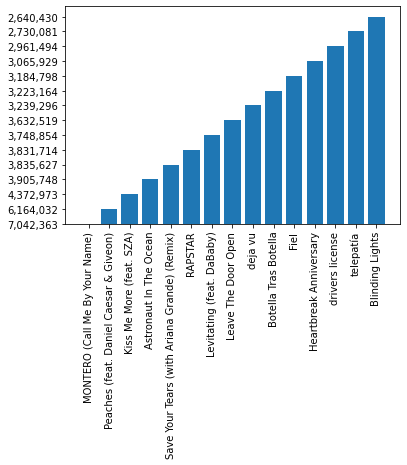

In [150]:
#song names and the number of plays the song got
plt.bar(track_15, streams_15)
plt.xticks(rotation = 90)
plt.show()

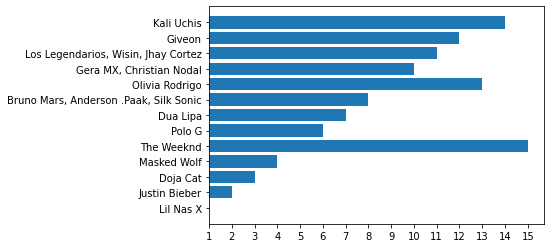

In [148]:
#artist vs. position on the charts
plt.barh(artist_15, position_15, align='center')
# plt.xticks(rotation = 90)
plt.show()

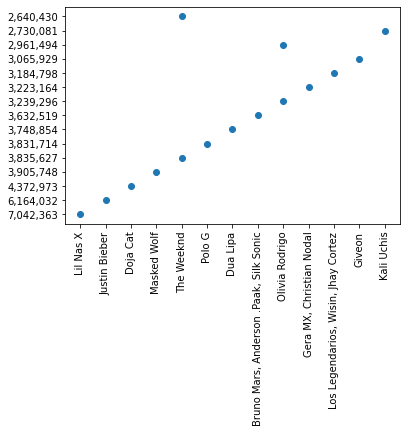

In [156]:
plt.scatter(artist_15,streams_15)
plt.xticks(rotation = 90)
plt.show()